In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('UberDataset.csv')

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [18]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [19]:
df.shape

(1156, 7)

In [21]:
df.dropna(inplace=True)

In [22]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


# Distribution of trip duration

In [26]:
date_format = "%m/%d/%Y %H:%M"

df['START_DATE'] = pd.to_datetime(df['START_DATE'], format=date_format, errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format=date_format, errors='coerce')

In [27]:
df['TRIP_DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60


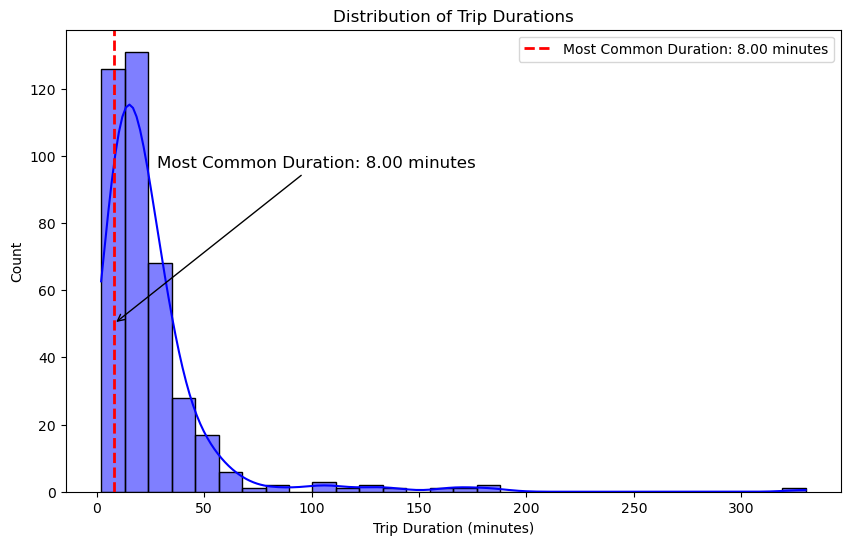

In [30]:
most_common_duration = df['TRIP_DURATION_MINUTES'].mode().values[0]

# Plotting the distribution of trip durations
plt.figure(figsize=(10, 6))
sns.histplot(df['TRIP_DURATION_MINUTES'], bins=30, kde=True, color='blue')

# Annotate the most common trip duration
plt.axvline(x=most_common_duration, color='red', linestyle='--', linewidth=2, label=f'Most Common Duration: {most_common_duration:.2f} minutes')
plt.annotate(f'Most Common Duration: {most_common_duration:.2f} minutes', xy=(most_common_duration, 50), xytext=(most_common_duration + 20, 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black', horizontalalignment='left', verticalalignment='top')

plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Correlation between trip duration and distance

In [45]:

correlation = df[['TRIP_DURATION_MINUTES', 'MILES']].corr()

print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                       TRIP_DURATION_MINUTES     MILES
TRIP_DURATION_MINUTES               1.000000  0.907358
MILES                               0.907358  1.000000


# Number of Uber Rides by Weekday

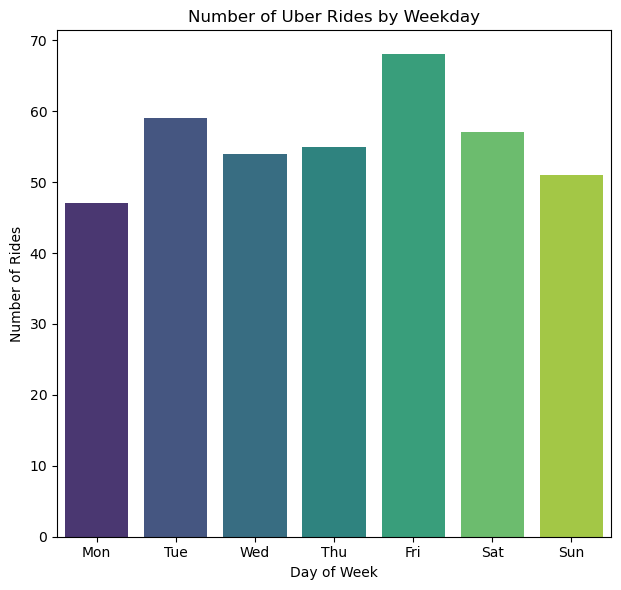

In [32]:

df['WEEKDAY'] = df['START_DATE'].dt.weekday  # Monday=0, Sunday=6


rides_by_weekday = df.groupby('WEEKDAY').size()

# Plotting
plt.figure(figsize=(12, 6))


# Plot for rides by weekday
plt.subplot(1, 2, 2)
sns.barplot(x=rides_by_weekday.index, y=rides_by_weekday.values, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Number of Uber Rides by Weekday')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

# Most Common Categories of Uber Trips

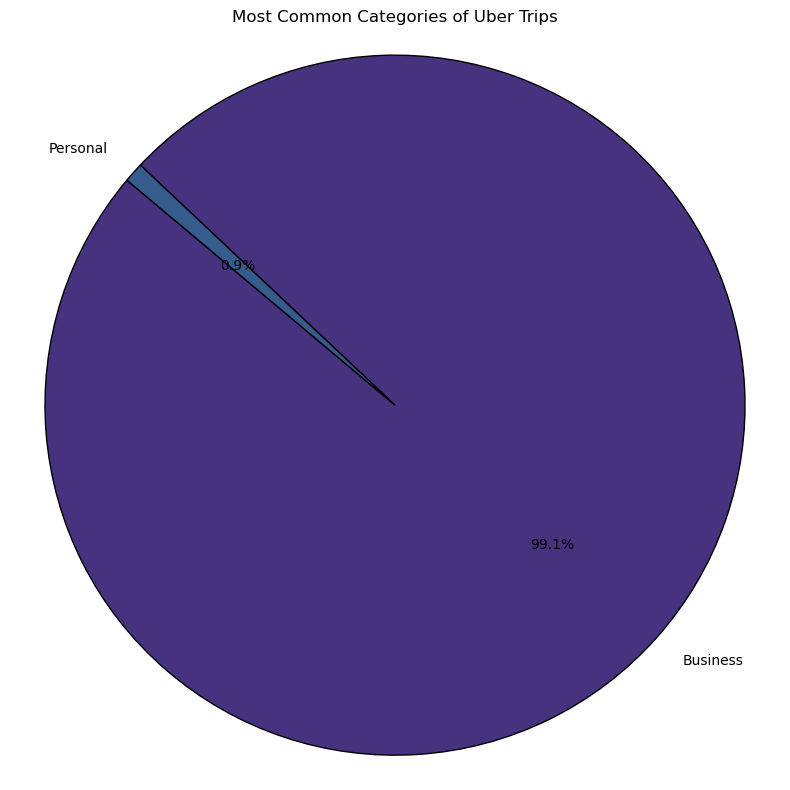

In [36]:
category_counts = df['CATEGORY'].value_counts()

# Plotting the most common categories in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops={'edgecolor': 'black'})
plt.title('Most Common Categories of Uber Trips')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# Mean Distance Traveled by Category

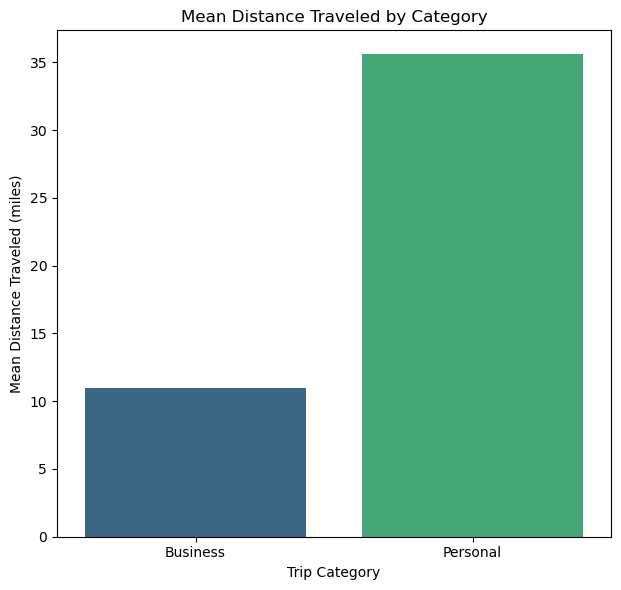

In [37]:
category_distance_corr = df.groupby('CATEGORY')['MILES'].mean()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=category_distance_corr.index, y=category_distance_corr.values, palette='viridis')
plt.xlabel('Trip Category')
plt.ylabel('Mean Distance Traveled (miles)')
plt.title('Mean Distance Traveled by Category')

plt.tight_layout()
plt.show()

# TOP OF MOST FREQUENT

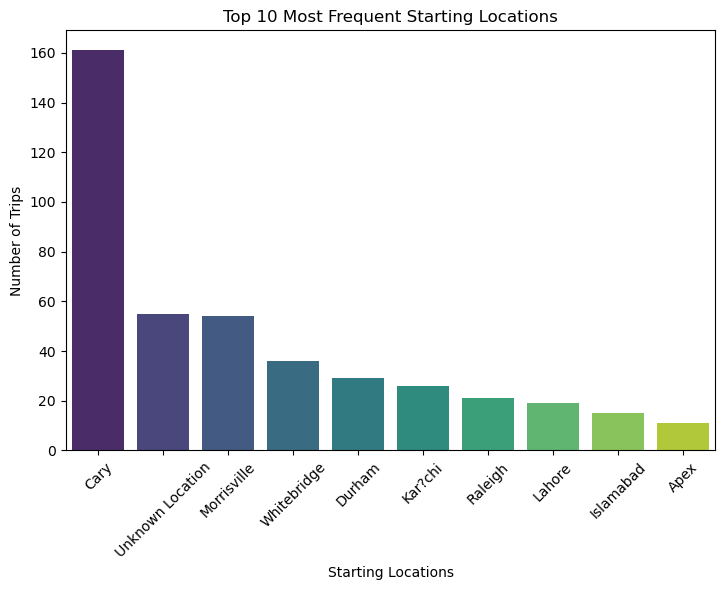

In [39]:
start_counts = df['START'].value_counts().head(10)  # Top 10 starting locations

# Visualize the most frequent starting and stopping locations
plt.figure(figsize=(14, 6))

# Plot for starting locations
plt.subplot(1, 2, 1)
sns.barplot(x=start_counts.index, y=start_counts.values, palette='viridis')
plt.xlabel('Starting Locations')
plt.ylabel('Number of Trips')
plt.title('Top 10 Most Frequent Starting Locations')



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


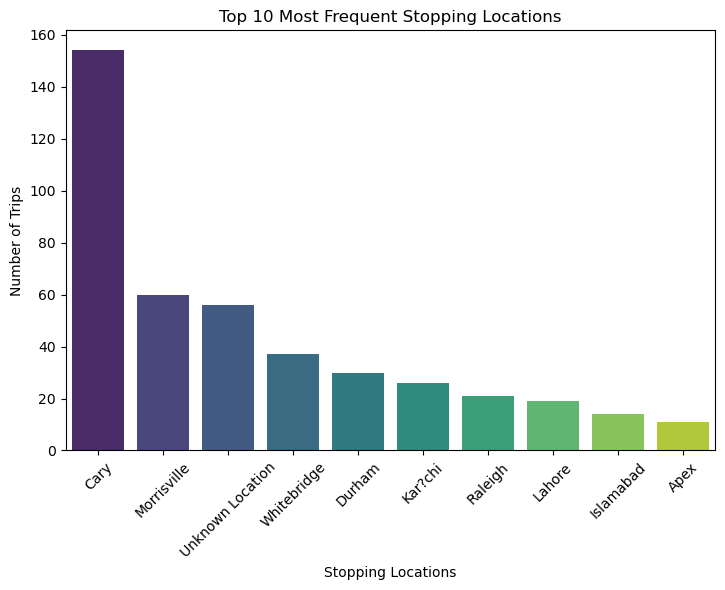

In [43]:
start_counts = df['STOP'].value_counts().head(10)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=stop_counts.index, y=stop_counts.values, palette='viridis')
plt.xlabel('Stopping Locations')
plt.ylabel('Number of Trips')
plt.title('Top 10 Most Frequent Stopping Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of distances traveled

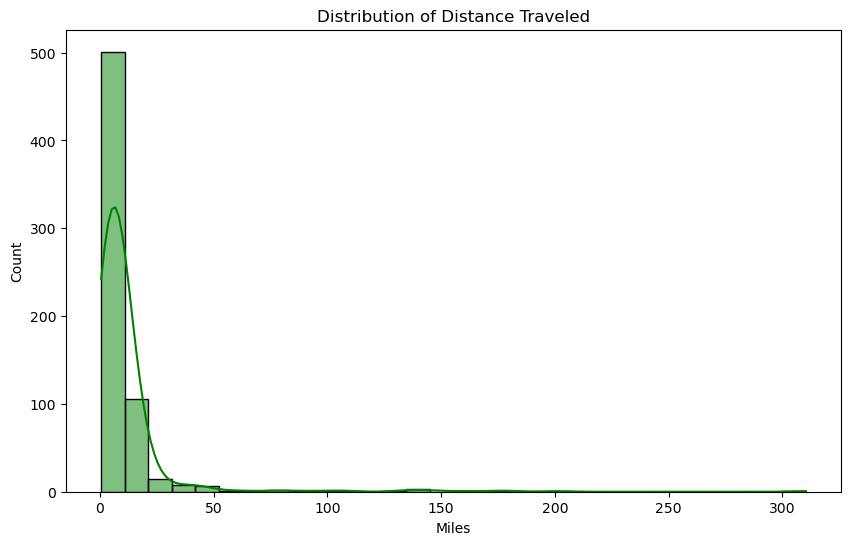

In [49]:



plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True, color='green')
plt.title('Distribution of Distance Traveled')
plt.xlabel('Miles')
plt.ylabel('Count')
plt.show()

